# [TITLE OF EXERCISE]

In dieser Übung werden wir uns der Verwendung von RViz.RViz, einem 3D-Visualizer, nähern, der es Ihnen ermöglicht, Sensor- und Zustandsinformationen anzuzeigen. Wir verwenden RViz, um unsere Roboter zu modellieren, bevor wir tatsächliche Hardware einsetzen.

## RViz starten

RViz als Programm zu starten ist sehr einfach. Du kannst es ganz einfach tun, indem du die folgende Codezeile ausführst. Bevor Sie dies tun, stellen Sie sicher, dass roscore läuft.

In [15]:
!rosrun rviz rviz

[ INFO] [1555581896.468486378]: rviz version 1.12.16
[ INFO] [1555581896.468593373]: compiled against Qt version 5.5.1
[ INFO] [1555581896.468609855]: compiled against OGRE version 1.9.0 (Ghadamon)
[ INFO] [1555581896.875236681]: Stereo is NOT SUPPORTED
[ INFO] [1555581896.875379364]: OpenGl version: 3 (GLSL 1.3).
0x2725ca0 void QWindowPrivate::setTopLevelScreen(QScreen*, bool) ( QScreen(0x1bd7fd0) ): Attempt to set a screen on a child window.
0x272a0b0 void QWindowPrivate::setTopLevelScreen(QScreen*, bool) ( QScreen(0x1bd7fd0) ): Attempt to set a screen on a child window.
0x2726650 void QWindowPrivate::setTopLevelScreen(QScreen*, bool) ( QScreen(0x1bd7fd0) ): Attempt to set a screen on a child window.
0x28ffe00 void QWindowPrivate::setTopLevelScreen(QScreen*, bool) ( QScreen(0x1bd7fd0) ): Attempt to set a screen on a child window.
0x29a54d0 void QWindowPrivate::setTopLevelScreen(QScreen*, bool) ( QScreen(0x1bd7fd0) ): Attempt to set a screen on a child window.
0x29e9540 void QWindowPr

Es sollte ein neues Fenster erscheinen, das wie folgt aussieht. 

<img src="img/RViz1.jpg" alt="RViz1" style="width: 800px;"/>

Sie sollten beachten, dass in der Symbolleiste auf der linken Seite ein Fehler aufgetreten ist. 

Da steht: "Keine tf-Daten.  Tatsächlicher Fehler: Fixed Frame[map] existiert nicht". Als nächstes werden wir sicherstellen, dass tf-Daten vorhanden sind und dass wir einen festen Rahmen haben, auf dem wir andere Informationen übertragen können.

## tf Frames

Wenn wir den Unterschied zwischen der Bewegung von Objekt1 und Objekt2 finden wollten, wie würden wir das tun? In ROS benötigen wir Funktionalität, um sowohl auf Objekte verweisen als auch deren Position, Geschwindigkeit usw. vergleichen zu können. Die tf-Frames erlauben es uns, dies zu tun. Wie bewegt sich der Greifer in Bezug auf einen Arm? Vergleichen Sie den Greifer tf Rahmen mit dem Arm tf Rahmen. Wenn wir daran arbeiten wollten, wie sich ein Laser bewegt, wäre es am einfachsten, dies in Bezug auf den Laser zu tun, anstatt zu versuchen, das zu bewegen, woran der Laser befestigt ist. Wenn wir den Abstand zwischen zwei Elementen wollten, würden wir den Abstand zwischen ihren Rahmen finden.

<img src="img/tfframes.png" alt="tf Frames" style="width: 400px;"/>


Zusätzlich pflegt tf eine heirachy zwischen den Frames. tf pflegt diese Erbarchitektur mit einem Baum. Im obigen Beispiel sehen wir den Rahmen "Welt". Dieser Rahmen ist unser Hintergrund, und er ist während unserer gesamten Simulation statisch. Dann haben wir den Turtle1-Rahmen, der vermutlich für einen Turtleboter ist. Dieser Rahmen wird sich basierend auf der Bewegung unserer Schildkröten-Simulation bewegen. Wir haben einen anderen Rahmen für eine Schildkröte, turle2. Beachten Sie im Beispiel, dass ein Pfeil nicht zwischen Schildkröte1 und Schildkröte2 verläuft, da diese beiden Rahmen keine Abhängigkeit haben. Beide sind abhängig vom World (Parent) Frame (alle tf Frames sind entweder ein Parent- oder ein Child Frame, oder beides). Es gibt einen letzten Rahmen namens "carrot1". Dieser Rahmen hat eine Abhängigkeit von "turtle2". Diese Abhängigkeit könnte beispielsweise sein, dass die Position von carrot1 auf der Position von turtle2 basiert.

### Fester Rahmen

Der Fixed Frame bietet einen Bezugsrahmen für die Visualisierungen in RViz. Denken Sie an das klassische physikalische Problem, dass zwei Autos aufeinander zu fahren. Wenn ein Auto mit 25 m/s und das andere Auto mit 35 m/s fährt, dann bewegt sich jedes Auto von einem festen Bezugspunkt aus mit der Geschwindigkeit, mit der es sich bewegt. Ausgehend vom Bezugsrahmen eines der Autos bewegt sich das Auto nicht und das andere Auto bewegt sich mit 60m/s.

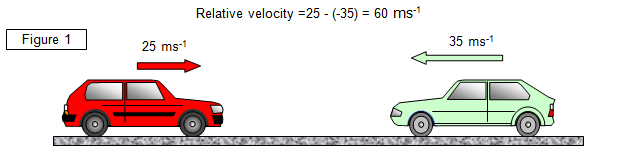

Der Fixed Frame in RViz ähnelt dem Bezugsrahmen des physikalischen Problems. Damit unsere Simulationen sinnvoll sind, brauchen wir einen Bezugsrahmen. Wenn unser Bezugssystem der Arm eines Roboters wäre, wäre der Arm immer statisch und jedes andere Element, einschließlich des Hintergrunds, würde sich um ihn herum bewegen.  Die meisten Elemente haben einen Rahmen, der Fixed Frame in RViz ist der tf-Frame, den wir als Bezugsrahmen für unsere Simulation auswählen.

In RViz wird also, unabhängig davon, welchen tf-Rahmen wir als unseren festen Rahmen festlegen, dieser Rahmen unser Bezugsrahmen sein. Was auch immer (0,0,0,0) für den tf-Frame ist, der als Fixed Frame eingestellt ist, ist (0,0,0,0) definiert in RViz. Es gibt keinen absoluten Hintergrund, keinen universellen Ursprungspunkt. Es gibt nur die Unterschiede zwischen definierten Frames.



#### Anzeigen von tf-Daten

Wir beginnen damit, zu sehen, welche tf-Daten veröffentlicht werden. Jeder feste Rahmen gibt Daten aus, die wir uns ansehen können. Führen Sie die folgende Codezeile in einem Terminal aus, es wird 5 Sekunden lang auf alle tf-Daten warten, dann einen tf-Baum erstellen und ihn in einer.pdf-Datei veröffentlichen.


In [23]:
!rosrun tf view_frames

!evince frames.pdf

Listening to /tf for 5.000000 seconds
Done Listening
dot - graphviz version 2.38.0 (20140413.2041)

Detected dot version 2.38
frames.pdf generated


Die resultierende pdf-Datei zeigt, dass es keine aktiven tf-Frames gibt. Daher gibt es keine tf-Daten zum Anhören. Als nächstes erzeugen wir einige tf-Daten, die wir uns anhören können.

#### Veröffentlichung eines tf-Frames

Es gibt einen relativ einfachen Befehl, der einen tf-Frame relativ zur "Welt" veröffentlichen kann. Der Befehl, den wir im Terminal ausführen möchten, lautet:


In [44]:
static_transform_publisher 5 0 0 0 0 0 1 world world1

SyntaxError: invalid syntax (<ipython-input-44-d772417de3cc>, line 1)

Dieser Befehl kann auch im folgenden Jupyter-Notebook ausgeführt werden,

In [14]:
import subprocess
world1_tf_process=subprocess.Popen(["static_transform_publisher", "5", "0", "0", "0", "0", "0", "1", "world", "world1"])

Wenn Sie nun den Befehl zum Hören von tf-Daten erneut ausführen, sollten Sie einen tf-Baum mit zwei Elementen sehen, der Welt und Welt1. Zusätzlich können Sie RViz neu starten und den Fixed Frame entweder auf die Welt oder auf world1 einstellen.

Der Befehl static_transform_publisher erstellt ein untergeordnetes tf-Frame aus einem Basis-Tf-Frame. In diesem Fall ist unser Kinder-Tf-Rahmen world1 und der Basis-Tf-Rahmen world1. Die ersten drei numerierten Argumente sind die Argumente x, y, z in Bezug auf unseren tf-Basisrahmen. Damit ist die Welt1 auf der x-Achse um fünf verschoben. Die nächsten vier Argumente sind Rotationsdaten, so dass world1 im Vergleich zur world leicht gedreht wird. 

Es gibt hier drei wichtige Dinge zu beachten, die bei tf frames zu beachten sind,

* Ein tf-Frame muss eine Übersetzung haben, um zu existieren. Es ist nicht möglich, eine 0-Übersetzung zu haben, die nur einen Unterrahmen erstellt, der mit dem übergeordneten Rahmen identisch ist. tf erlaubt dies nicht. Ein Unterrahmen könnte jedoch die Übersetzung rückgängig machen, die sein übergeordneter Rahmen macht und immer noch gültig ist (z.B. verschiebt world1 alles nach x+1, world2 könnte alles nach x-1 verschieben und somit wäre world2 gleichwertig mit world, aber diese werden als unterschiedliche tf-Frames betrachtet).

* In ähnlicher Weise ist jeder Rahmen entweder ein übergeordneter Rahmen, ein Unterrahmen oder beides. Ein Frame kann ohne seine Verbindung zu anderen Frames nicht existieren. Auch hier gibt es keine universellen Konstanten, sondern nur die Beziehungen zwischen tf-Frames.

* Wenn tf mit widersprüchlichen Transformationen versehen ist (z.B. Welt -> Wolrd1 -> Welt2 ist nicht gleich Welt -> Welt2), dann ist diejenige Transformation, die zuerst genannt wurde, die im tf-Baum aktiv ist. Die zweite Übersetzung wird ignoriert. 

Nun, da wir tf Frames verstehen, lassen Sie uns etwas senden, das wir in unseren Rahmen stellen können.

## Publisher

Wir haben in der letzten Übung ein wenig über die Veröffentlichung bzw. das Abonnement gesprochen. Es ist eine kritische Idee in ROS, da es darum geht, wie Informationen zwischen verschiedenen Elementen gesendet werden. In diesem Teil der Übung werden wir mehrere verschiedene Publisher und Abonnenten anlegen.


### Einen Marker veröffentlichen

Ein Marker im RViz ist nur eine Form. Wir können sie als Platzhalter verwenden, um zu sehen, ob wir etwas korrekt veröffentlichen. Sie sind auch großartige Werkzeuge, um mehr über Publishing und RViz zu erfahren.

#### Was ist ein Marker?

Ein Marker in RViz ist ein Stand-in-Objekt. Es ist eine Möglichkeit für uns, um zu sehen, ob Informationen korrekt veröffentlicht / abonniert werden. Das Senden von tatsächlichen Roboterdaten kann sehr rechenintensiv sein (insbesondere wenn viele Daten zu übertragen sind). Darüber hinaus können die zu sendenden Daten fehlerhaft sein. Eine Möglichkeit, einen Publisher/Abonnenten zu debuggen und sicherzustellen, dass dieser Aspekt in Ordnung ist, ist die Verwendung von Markern. Marker sind einfache Objekte. Wenn wir ein Problem damit haben, dass Roboterdaten nicht angezeigt werden, können wir einen Marker senden. Wenn der Marker erscheint, wissen wir, dass der Publisher/Abonnent korrekt arbeitet und das Problem woanders liegt.

Wenn Sie zum ersten Mal etwas über ROS, RViz, tf Frames, etc. lernen, sind Marker eine gute Möglichkeit, die notwendigen Fähigkeiten zu üben und zu entwickeln, um komplexere Aufgaben zu lösen. Die folgende Übung wird auf Ihr Verständnis der in dieser Übung behandelten Themen eingehen, weshalb wir sie behandeln.

##### Einen Marker kodieren

Zuerst müssen wir den Marker-Verlag definieren, was wir unten tun.

In [55]:
%%writefile mark.py
#!/usr/bin/env python

import rospy, roslib
import tf
from visualization_msgs.msg import Marker
import std_msgs.msg as stm
from multiprocessing import Process


def pub_mark():
    rospy.init_node("mark")
    
    while not rospy.is_shutdown():
        
        # Creates Marker object named marker
        marker = Marker()
        
        # Define marker parameters
        marker.header.frame_id = "/world1"
        marker.header.stamp = rospy.Time.now()
        marker.type = Marker.CUBE
        marker.action = Marker.ADD
        marker.scale.x = 1
        marker.scale.y = 1
        marker.scale.z = 1
        marker.id = 10
        marker.pose.position.x = 0;
        marker.pose.position.y = 0;
        marker.pose.position.z = 0;
        marker.pose.orientation.x = 0.0;
        marker.pose.orientation.y = 0.0;
        marker.pose.orientation.z = 0.0;
        marker.pose.orientation.w = 1.0;
        marker.color = stm.ColorRGBA(r=0.0, g=1.0, b=0.0, a=0.8)
        marker.lifetime.secs = 10
        
        # Schreiben Sie mit dem, was Sie in der letzten Übung gelernt haben, 
        #  einen Herausgeber vom Typ "Marker".
        
        pub.publish(marker)

    
if __name__ == "__main__":
    pub_mark()




Overwriting mark.py


#### Erklärung des Kodexes

Das Wichtigste zuerst, die Import-Anweisungen. Die beiden wichtigsten sind hier der Marker von visualization_msgs.msg und die std_msgs.msg. Der Marker ist ein vordefiniertes Objekt, das uns das Leben leicht macht. Anstatt dies von Grund auf neu erstellen zu müssen, können wir den Marker einfach mit unseren eigenen Informationen ausfüllen und dann veröffentlichen. Die Datei std_msgs.msg enthält viele gängige Formate. Wir werden es benutzen, um die Farbe unseres Markers einzustellen.

Die nächste wichtige Linie ist

`marker = Marker()`

Dadurch wird ein Marker-Objekt namens "marker" erstellt. Wir werden "marker" modifizieren und schließlich veröffentlichen. Marker ist die Outline, die in visualization_msgs.msg definiert ist, während Marker das Objekt ist, das wir selbst modifizieren.

Die nächsten 16 Zeilen definieren verschiedene Parameter unseres Markers. Diese sind selbsterklärend. Ein wichtiger Hinweis ist: `marker.header.frame_id = "/world1"`

Diese Zeile setzt die Frame-ID, durch die die Position der Marker bestimmt werden soll. Wenn wir zum Beispiel die frame_id auf "world" setzen und "world" unser Fixed Frame ist, dann ist die Position des Markers (0,0,0,0) im RViz. Wenn wir die frame_id auf "world2" setzen, die im Vergleich zu "world" (unserem Fixed Frame) um +10 auf der x-Achse verschoben ist, dann befindet sich unser Marker an der Position (10,0,0) im RViz. 

Eine wichtige Sache zu beachten ist, dass, wenn der Fixed Frame nicht mit der frame_id verwandt ist, der Marker nicht erscheint. Wenn wir zum Beispiel die frame_id auf "earth" setzen, es aber keine Übersetzung zwischen "world" (unser Fixed Frame) und "earth" gibt, dann erscheint unser Marker nicht. Denn RViz weiß nicht, wohin der Marker relativ zum festen Rahmen gehen soll.

Die nächste Schlüsselzeile ist `pub = rospy.Publisher("Otto_von_Vismark", Marker, queue_size=10)`. Dadurch entsteht der Publisher, der unseren Marker an RViz übermittelt. Die "Otto_von_Vismark" ist der Name des ROS-Themas, zu dem wir veröffentlichen, was wichtig ist, da wir den Namen dieses Themas kennen müssen, um es abonnieren zu können. Dieser Topic-Name kann alles sein, solange er nicht der Name eines anderen Topic ist. Du wirst feststellen, dass diese Linie der gleichen Linie in Übung0 sehr ähnlich ist.


Das nächste Argument ist Marker, das lediglich die Art der Informationen angibt, die über dieses Thema gesendet werden.

Schließlich veröffentlichen wir die Markierung mit dem Publisher.

###### Den Publisher betreiben

Die allererste Zeile des Codes im Jupyter Notebook ist `%%%writefile mark.py`. Dadurch wird einfach alles, was danach geschrieben wird, in eine Datei "mark.py" geschrieben. Führen Sie den obigen Code aus, um "mark.py" zu erstellen. Danach können wir unseren Publisher im Jupyter Notebook betreiben. Stelle zuerst sicher, dass roscore läuft. Dann stellen Sie sicher, dass unsere statische tf-Frame-Übersetzung zwischen "world" und "world1" läuft, ohne die es keine tf-Frames gibt, auf die Sie verweisen können. Führen Sie dann den folgenden Code aus. Führen Sie schließlich RViz aus.

<div class="alert alert-block alert-warning">
<b>Hinweis:</b> Wenn Sie RViz zuerst ausführen, wird nichts funktionieren. Aufgrund der Art und Weise, wie Jupyter Notebooks Prozesse planen, warten die Befehle für die tf-Frame-Übersetzung und der Publisher bis zum Ende der Ausführung von RViz (da RViz im Gegensatz zur tf-Frame-Übersetzung und zum Publisher nicht im Hintergrund läuft).
</div>



In [56]:
import subprocess

mark_publisher_process=subprocess.Popen(["python", "mark.py"])

Das Fenster, das wir zu Beginn dieser Übung gesehen haben, hätte erscheinen müssen.

Das erste, was wir tun müssen, ist, den Fixed Frame einzustellen. Wir haben derzeit zwei aktive tf-Frames, "world" und "world1". Zuerst müssen wir einen auswählen, der unser Fixed Frame ist. Da wir die frame_id unseres Markers auf "world1" gesetzt haben, wollen wir das als unseren Fixed Frame auswählen. Wenn Sie in den "Globalen Optionen" links neben Fixed Frame auf das Dropdown-Menü klicken, sollten Sie beide aktiven tf Frame sehen. Wenn du es nicht tust, bedeutet das wahrscheinlich, dass diese Frames nicht aktiv sind. Überprüfen Sie den tf-Baum, um sicherzustellen, dass beide noch existieren.

Nachdem Sie den Fixed Frame ausgewählt haben, müssen wir einen Teilnehmer zu unserem Marker hinzufügen. Dies ist in RViz einfach zu tun. Gehen Sie zunächst zum unteren Rand des Bereichs "Displays" auf der linken Seite und klicken Sie auf "Hinzufügen". Finde "Marker" und füge ihn hinzu. Suchen Sie den Abschnitt im Marker mit dem Titel "Marker Topic". Klicken Sie darauf und Sie sollten den Namen des Themas sehen, das wir im Publisher definiert haben. Alternativ können Sie auch den Namen des Themas eingeben. 

Wenn all das erledigt ist, sollten Sie einen Bildschirm sehen, der so aussieht,
<img src="img/RViz3.jpg" alt="RViz2" style="width: 800px;"/>

Sie werden feststellen, dass der Würfel genau in der Mitte des Gitters erscheint. 

<div class="alert alert-block alert-info">
<b>Versuchen Sie</b> den Fixed Frame von "world1" auf "world" zu ändern. Der Block sollte sich bewegen. Weißt du, warum?
</div>











## Abschlussübung

Nun, da wir beginnen, tf Rahmen und Veröffentlichung zu verstehen, lassen Sie uns alles zusammenfassen, was wir aus dieser Übung und der letzten Übung gelernt haben. Das Verständnis, wie alle diese Themen zueinander in Beziehung stehen, ist notwendig, um die nächste Übung abzuschließen.


<div class="alert alert-block alarm-erfolg">
<b>Ziel:</b> Bewegen Sie einen Marker im RViz, basierend auf den Bewegungen einer Schildkröte in der Schildkröte.
</div>


Um zu wissen, wie man unseren Marker bewegt, müssen wir zuerst Daten von Schildkröten sammeln. Wir haben das bereits in der ersten Übung getan, aber anstatt es auszudrucken, wollen wir die Informationen neu verpacken und an unseren Marker schicken.

Nachfolgend finden Sie die vollständige Übersicht über den Code, der zur Erreichung unseres Ziels erforderlich ist. Einige Stücke fehlen, also müssen Sie sie unterstützen, die auf dem basieren, was Sie in den letzten zwei Übungen gelernt haben.



In [1]:
%%writefile TurtleMover.py
#!/usr/bin/env python
import rospy
from std_msgs.msg import String
from turtlesim.msg import Pose
from visualization_msgs.msg import Marker
import std_msgs.msg as stm
from multiprocessing import Process



def callback(data):

    #Den Publisher hier eintragen


    
def listener():


    rospy.init_node('listener', anonymous=True)

    #Den Subscriber hier eintragen
    
    rospy.spin()

if __name__ == '__main__':
    listener()



Overwriting TurtleMover.py


In [13]:
import subprocess

mark_publisher_process=subprocess.Popen(["python", "TurtleMover.py"])